## Overview of Bank Transactions Dataset

This dataset contains transaction records from 515 banks. It includes information such as the number of Demand Drafts (DD) issued, withdrawal and deposit amounts, among other details.

## Setting Up and Loading Data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt_obj
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank_data = pd.read_csv("bank.csv").round(2)

## Data Exploration

In [4]:
bank_data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [5]:
bank_data.shape

(515, 6)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


# Checking Summary Statistic

In [7]:
bank_data.describe().round(2)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.00,515.00,515.00,515.00,515.00,515.00
mean,258.00,232.25,150.69,81.69,2934.67,598.60
std,148.81,66.65,56.90,28.60,437.06,83.49
min,1.00,120.00,10.00,33.00,1200.00,380.00
25%,129.50,169.50,103.00,58.00,2675.00,537.50
50%,258.00,237.00,152.00,80.00,2960.00,601.00
75%,386.50,291.00,200.00,105.00,3300.00,657.50
max,515.00,350.00,247.00,212.00,3650.00,838.00


# Checking for Duplicates

In [8]:
bank_data.duplicated().sum()

0

There are no Duplicates in the dataset

# Scaling the data

In [9]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [10]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [11]:
scaled_df = pd.DataFrame(X.fit_transform(bank_data.iloc[:,1:6]),columns=bank_data.columns[1:]).round(2)

In [12]:
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.08,-0.06,1.03,-1.09,0.48
1,-1.64,-1.14,-0.58,1.32,-1.95
2,1.11,-0.03,-0.20,-0.84,0.84
3,0.28,-0.68,1.66,1.64,0.29
4,-0.87,-0.28,1.62,1.07,-0.24
...,...,...,...,...,...
510,1.57,-0.19,1.03,-0.67,1.14
511,-0.96,-0.35,-0.76,-0.67,-0.89
512,1.51,-1.14,0.92,-0.19,0.93
513,-0.60,0.45,-1.67,-0.40,-1.12


# Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [13]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [14]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [15]:
# Get the labels
k_means.labels_

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

### Within Cluster Sum of Squares

In [16]:
round(k_means.inertia_,2)

1943.12

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [17]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

2575.15

In [18]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

1593.87

In [19]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

1375.48

In [20]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

1220.43

In [21]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
round(k_means.inertia_,2)

1115.63

WSS reduces as K keeps increasing

### Calculating WSS for other values of K - Elbow Method

In [22]:
wss =[] 

In [23]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(round(KM.inertia_,2))

In [24]:
wss

[2575.15,
 1943.12,
 1593.87,
 1375.48,
 1220.43,
 1115.63,
 1021.05,
 945.07,
 885.53,
 832.91]

In [25]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

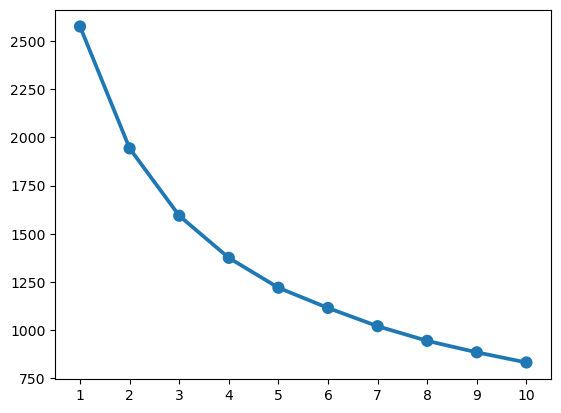

In [26]:
sns.pointplot(a, wss)

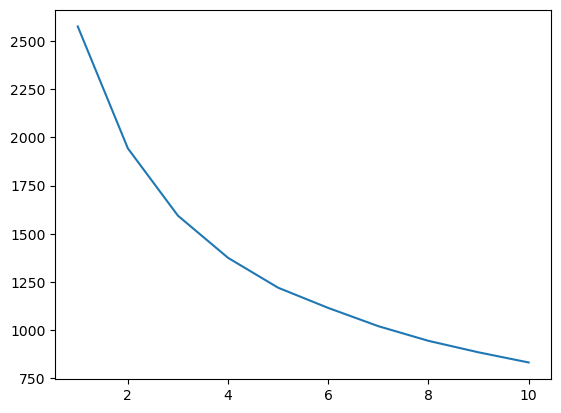

In [27]:
plt_obj.plot(range(1,11), wss)

# KMeans with K=3

In [28]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.22012372548559384

# KMeans with K=4

In [31]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 4 clusters

In [33]:
silhouette_score(scaled_df,labels,random_state=1)

0.22761528957199523

# KMeans with K=5

In [34]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 5 clusters

In [36]:
silhouette_score(scaled_df,labels,random_state=1)

0.2299957748881433

### Silhouette score is highest for k = 5

silhouette score is good for 5 clusters than for 4 clusters. So, final clusters will be 5

Appending Clusters to the original dataset

In [42]:
bank_data["Clus_kmeans5"] = labels
bank_data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans5
0,1,227,147,111,2460,639,4
1,2,123,86,65,3510,436,3
2,3,306,149,76,2570,669,1
3,4,251,112,129,3650,623,4
4,5,174,135,128,3400,579,4


# Silhouette Analysis

#### Let us now find the Silhouette Score for the values of K from 2 to 10

In [38]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2240428153732063
For n_clusters=3, the silhouette score is 0.22003757725730183
For n_clusters=4, the silhouette score is 0.22721004589141555
For n_clusters=5, the silhouette score is 0.23068771283394038
For n_clusters=6, the silhouette score is 0.2324786889375178
For n_clusters=7, the silhouette score is 0.22758511535875728
For n_clusters=8, the silhouette score is 0.22575793425500193
For n_clusters=9, the silhouette score is 0.22026633024136896
For n_clusters=10, the silhouette score is 0.21084626004493082


#### The maximum Silhouette Score is obtained for K=5, followed by K=4

# Cluster Profiling

In [39]:
bank_data.Clus_kmeans5.value_counts().sort_index()

0    132
1    104
2    106
3     88
4     85
Name: Clus_kmeans5, dtype: int64

In [40]:
clust_profile=bank_data.drop(['Bank'],axis=1)
clust_profile=bank_data.groupby('Clus_kmeans5').mean()
clust_profile['freq']=bank_data.Clus_kmeans5.value_counts().sort_index()
clust_profile

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans5,,,,,,,
0,274.909091,295.378788,106.636364,72.325758,3116.060606,606.606061,132
1,265.759615,285.326923,197.894231,84.490385,2517.211538,700.663462,104
2,253.754717,181.745283,189.896226,57.103774,2983.490566,563.311321,106
3,276.909091,169.136364,89.625000,90.579545,3005.056818,484.147727,88
4,207.964706,197.611765,175.694118,114.247059,3030.000000,623.811765,85


- Cluster 0: Extensive-scale bank characterized by average withdrawal and deposit activities, yet leading in Demand Drafts (DD).
- Cluster 1: Petite-scale bank notable for its peak walk-ins and withdrawals, balanced deposits, and typical DD transactions.
- Cluster 2: Mid-scale bank with below-average deposit rates, standard DD and walk-ins, but elevated withdrawal activities.
- Cluster 3: Mid-scale bank distinguished by fewer walk-ins and withdrawals, with standard deposit and DD transactions.
- Cluster 4: Mid-scale bank with predominant walk-ins and deposit activities, balanced DD transactions, and regular withdrawals.